In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

import ipywidgets as widgets

In [2]:
city_conn = sqlite3.connect("city.sqlite")
city_df = pd.read_sql_query("select * from cities;", city_conn)
city_df

,index,city,population
0,0,Tokyo,37393129
1,1,Delhi,30290936
2,2,Shanghai,27058479
3,3,Sao Paulo,22043028
4,4,Mexico City,21782378
...,...,...,...
1137,1137,Taipei,2646204
1138,1138,Oświęcim,39057
1139,1139,Suzhou,10721700
1140,1140,"Washington, D.C.",702455


In [3]:
museum_conn = sqlite3.connect("museum.sqlite")
museum_df = pd.read_sql_query("select * from museums;", museum_conn)
museum_df

,index,museum_name,city,nb_visitors,reported_year
0,0,Louvre,Paris,10200000,2018
1,1,National Museum of China,Beijing,8610092,2018
2,2,Metropolitan Museum of Art[b],New York City,6953927,2018
3,3,Vatican Museums,Vatican City,6756186,2018
4,4,National Air and Space Museum,"Washington, D.C.",6200000,2018
...,...,...,...,...,...
57,57,Van Gogh Museum,Amsterdam,2161160,2018
58,58,Tretyakov Gallery,Moscow,2148538,2018
59,59,Shanghai Museum,Shanghai,2111730,2018
60,60,Auschwitz-Birkenau State Museum,Oświęcim,2100000,2018


In [4]:
museum_population_df = museum_df.merge(city_df, on='city')
museum_population_df

,index_x,museum_name,city,nb_visitors,reported_year,index_y,population
0,0,Louvre,Paris,10200000,2018,25,11017230
1,21,Centre Pompidou,Paris,3551544,2018,25,11017230
2,26,Musée d'Orsay,Paris,3175000,2018,25,11017230
3,53,Cité des Sciences et de l'Industrie,Paris,2231000,2018,25,11017230
4,1,National Museum of China,Beijing,8610092,2018,7,20462610
...,...,...,...,...,...,...,...
57,51,Rijksmuseum,Amsterdam,2300000,2018,446,1148972
58,57,Van Gogh Museum,Amsterdam,2161160,2018,446,1148972
59,54,Galleria degli Uffizi,Florence,2230914,2018,766,708357
60,55,National Museum of Scotland,Edinburgh,2227773,2018,1048,536775


In [5]:
def plot(x, y):
    plt.figure(figsize=(15,7.5), dpi=80)
    plt.xlabel('City Population (millions)')
    plt.ylabel('Visitors (millions)')
    plt.scatter(x, y)
    m = LinearRegression()
    m = m.fit(np.array(x).reshape(-1,1), np.array(y))
    X_predict = [x.min(), x.max()]
    y_predict = m.predict(np.array(X_predict).reshape(-1,1))
    plt.plot(X_predict, y_predict, '-')

    y_pred = m.predict(np.array(x).reshape(-1,1))

    r2 = r2_score(y,y_pred)
    print(r2)

# Correlation between city population and number of museums visitors 

#### Consider same city to get average visitors?

In [6]:
avg_nb = widgets.Dropdown(
    options=[True, False],
    value=True,
    disabled=False,
)
avg_nb

Dropdown(options=(True, False), value=True)

### Outliers removal

In [7]:
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

treshold = 2.5

z = np.abs(stats.zscore(museum_population_df[['nb_visitors', 'population']]))

outliers = np.where(z > treshold)[0]
museum_population_df = museum_population_df.drop(outliers).reset_index()
museum_population_df

,index,index_x,museum_name,city,nb_visitors,reported_year,index_y,population
0,1,21,Centre Pompidou,Paris,3551544,2018,25,11017230
1,2,26,Musée d'Orsay,Paris,3175000,2018,25,11017230
2,3,53,Cité des Sciences et de l'Industrie,Paris,2231000,2018,25,11017230
3,5,12,China Science and Technology Museum,Beijing,4400000,2018,7,20462610
4,6,2,Metropolitan Museum of Art[b],New York City,6953927,2018,1134,8398748
5,7,9,American Museum of Natural History,New York City,5000000,2018,1134,8398748
6,8,36,Museum of Modern Art,New York City,2774103,2018,1134,8398748
7,9,3,Vatican Museums,Vatican City,6756186,2018,1135,825
8,10,4,National Air and Space Museum,"Washington, D.C.",6200000,2018,1140,702455
9,11,10,National Museum of Natural History,"Washington, D.C.",4800000,2018,1140,702455


#### Draw the chart

0.004692843485345821


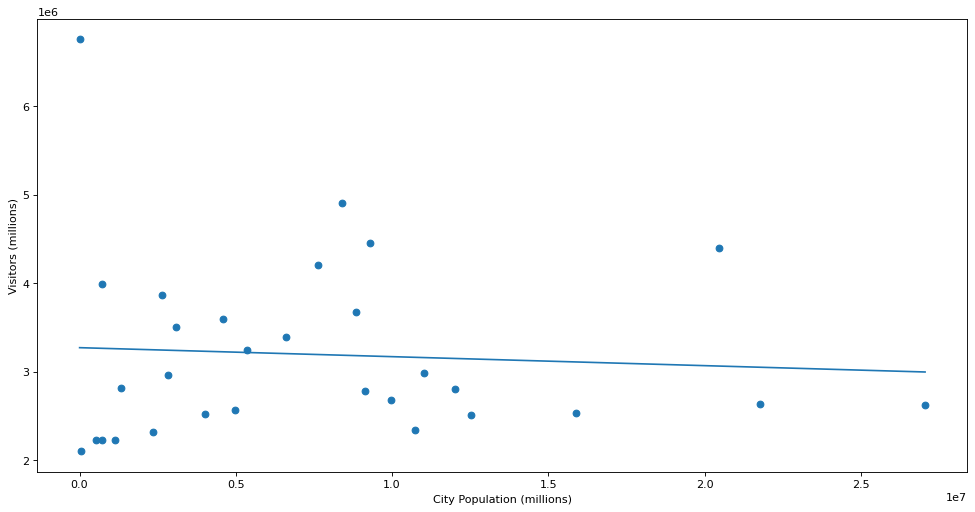

In [8]:
if avg_nb.value == True:
    avg_museum_population_df = museum_population_df.groupby(['city', 'population'], as_index=False)['nb_visitors'].mean()
    y = avg_museum_population_df['nb_visitors']
    x = avg_museum_population_df['population']
    plot(x, y)
else:
    y = museum_population_df['nb_visitors']
    x = museum_population_df['population']
    plot(x, y)